In [2]:
import pandas
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Schematics
# 1. Read the data file
# 2. Select specific columns only
# 3. Rename column headers as required
# 4. Replace values if required
# 5. Apply algorithm and predict


#

# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic.score(X_test, y_test)))
#
# # Display the plot


In [3]:
data = pandas.read_csv('Weather Dataset_Filtered.csv', header=0, usecols=[8])
data

,WeatherType
0,#NAME?
1,
2,
3,
4,
...,...
435,
436,
437,
438,


In [4]:
# 1. Read data file
data = pandas.read_csv('Weather Dataset_Filtered.csv', header=0, usecols=[8, 10, 15])
data = data.dropna()
print(data)
# print(data.shape)
# print(list(data.columns))
# 2. Select specific columns only
# data_cleansed = data[['WeatherType', 'DryBulbCelsius', 'RelativeHumidity']]
data_cleansed = data
# 3. Rename column headers as required
data_cleansed.columns = ['isRain', 'temperature', 'humidity']
# 4. Replace values if required
pandas.options.mode.chained_assignment = None  # default='warn'
data_cleansed['isRain'].replace(to_replace=r'^.*(RA|SN|DN|PL).*$', value=r'Yes', regex=True, inplace=True)
data_cleansed['isRain'].replace(to_replace=r'^(?!.*Yes).*$', value=r'No', regex=True, inplace=True)
print(data_cleansed.shape)
print(data_cleansed)

    WeatherType  DryBulbCelsius  RelativeHumidity
0        #NAME?            24.4                90
1                          24.4                85
2                          24.4                85
3                          24.4                82
4                          24.4                82
..          ...             ...               ...
435                        26.1                69
436                        25.6                71
437                        25.6                74
438                        25.6                74
439                        25.6                71

[440 rows x 3 columns]
(440, 3)
    isRain  temperature  humidity
0       No         24.4        90
1       No         24.4        85
2       No         24.4        85
3       No         24.4        82
4       No         24.4        82
..     ...          ...       ...
435     No         26.1        69
436     No         25.6        71
437     No         25.6        74
438     No         25.6    

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_cleansed[['humidity']+['temperature']], data_cleansed[['isRain']], random_state=0, test_size=0.25)

# sns.countplot(y=data_cleansed['isRain'], data=data_cleansed)
# plt.show()


logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X_train, y_train.values.ravel())
predict = logistic.predict(X_test)
# print(X_test)
cm1 = confusion_matrix(y_test, predict)
# print(cm1)
print(logistic.predict([[24.4, 90]]))

['No']


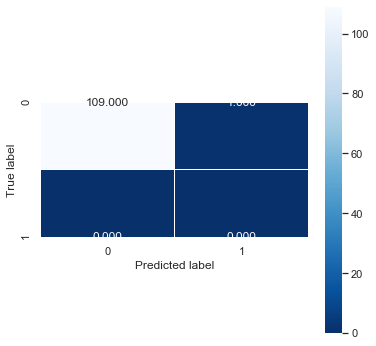

In [6]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(6, 6))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [9]:
print(y_train)

    isRain
14      No
299     No
356     No
200     No
220     No
..     ...
323     No
192     No
117     No
47      No
172     No

[330 rows x 1 columns]


In [13]:
y_train[y_train['isRain'] == 'YES']

,isRain


SyntaxError: invalid syntax (<ipython-input-14-e94c29125cc0>, line 1)